In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda:0')

transform_train = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32 #same as part 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)

In [ ]:
learn_rate = 0.001
n_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.6)

In [ ]:
running_loss_list = []
running_val_loss_list = []

running_acc_list = []
running_val_acc_list = []

learning_rates = []

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print("Epoch", epoch)
    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        count += 1

        _, prediction = torch.max(outputs.data, 1)
        correct += (prediction == labels).sum().item()
        total += labels.size(0)
    running_loss_list.append(running_loss/count)
    running_acc_list.append(correct/total)

    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()
    
    with torch.no_grad():
      running_val_loss = 0.0
      count = 0
      correct = 0
      total = 0

      for val_images, val_labels in testloader:
          val_images = val_images.to(device)
          val_labels = val_labels.to(device)

          val_outputs = net(val_images)
          val_loss = criterion(val_outputs, val_labels)

          running_val_loss += val_loss.item()
          count += 1

          _, val_prediction = torch.max(val_outputs.data, 1)
          correct += (val_prediction == val_labels).sum().item()
          total += val_labels.size(0)

    running_val_loss_list.append(running_val_loss/count)
    running_val_acc_list.append(correct/total)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


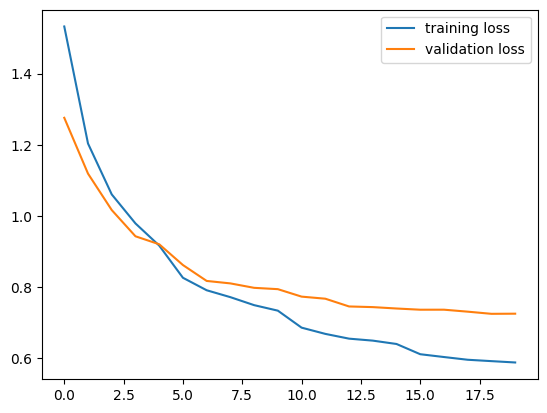

In [ ]:
plt.style.use('fast')
plt.plot(running_loss_list, label='training loss')
plt.plot(running_val_loss_list, label='validation loss')
plt.legend()
plt.savefig('loss_sched.png')

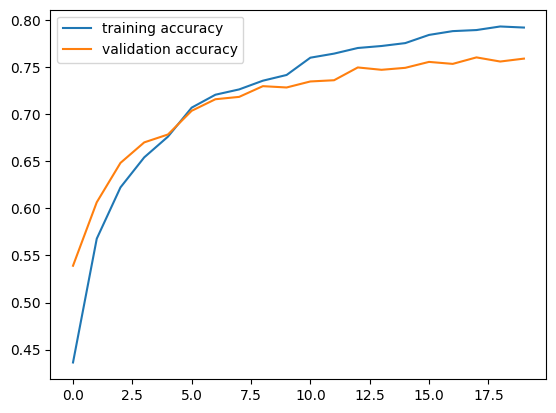

In [ ]:
plt.style.use('fast')
plt.plot(running_acc_list, label='training accuracy')
plt.plot(running_val_acc_list, label='validation accuracy')
plt.legend()
plt.savefig('acc_sched.png')

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    print(f'{classname:5s} & {accuracy:.1f} \% \\\\')

plane & 82.5 \% \\
car   & 85.7 \% \\
bird  & 60.6 \% \\
cat   & 55.3 \% \\
deer  & 78.0 \% \\
dog   & 65.9 \% \\
frog  & 83.2 \% \\
horse & 80.4 \% \\
ship  & 81.4 \% \\
truck & 86.4 \% \\


</hline>

In [ ]:
device = torch.device('cuda:0')

transform_train = transforms.Compose([transforms.ToTensor()])

transform_test = transforms.Compose(
    [transforms.ToTensor()])

batch_size = 32 #same as part 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)

In [ ]:
learn_rate = 0.001
n_epochs = 20

#criterion = nn.KLDivLoss(reduction="batchmean")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.6)

In [ ]:
running_loss_list = []
running_val_loss_list = []

running_acc_list = []
running_val_acc_list = []

learning_rates = []

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print("Epoch", epoch)
    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        count += 1

        _, prediction = torch.max(outputs.data, 1)
        correct += (prediction == labels).sum().item()
        total += labels.size(0)
    running_loss_list.append(running_loss/count)
    running_acc_list.append(correct/total)

    #learning_rates.append(optimizer.param_groups[0]["lr"])
    #scheduler.step()
    
    with torch.no_grad():
      running_val_loss = 0.0
      count = 0
      correct = 0
      total = 0

      for val_images, val_labels in testloader:
          val_images = val_images.to(device)
          val_labels = val_labels.to(device)

          val_outputs = net(val_images)
          val_loss = criterion(val_outputs, val_labels)

          running_val_loss += val_loss.item()
          count += 1

          _, val_prediction = torch.max(val_outputs.data, 1)
          correct += (val_prediction == val_labels).sum().item()
          total += val_labels.size(0)

    running_val_loss_list.append(running_val_loss/count)
    running_val_acc_list.append(correct/total)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


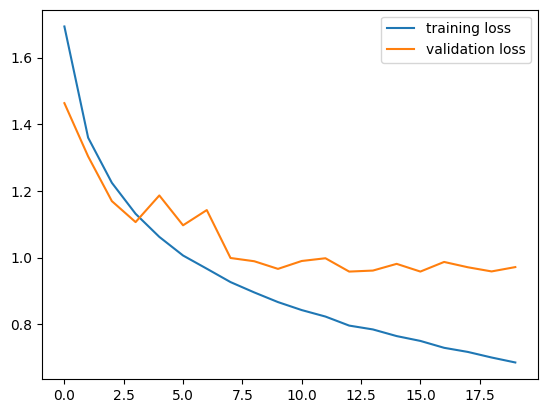

In [ ]:
plt.style.use('fast')
plt.plot(running_loss_list, label='training loss')
plt.plot(running_val_loss_list, label='validation loss')
plt.legend()
plt.savefig('loss_without_aug.png')

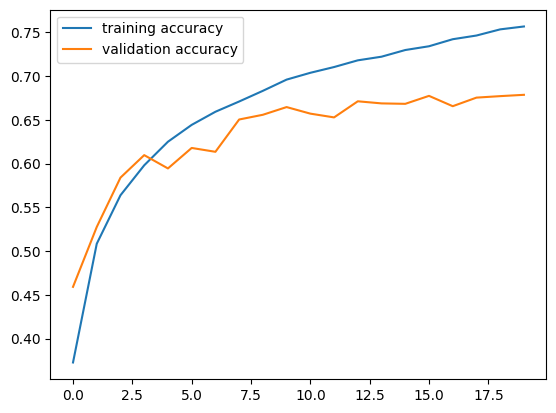

In [ ]:
plt.style.use('fast')
plt.plot(running_acc_list, label='training accuracy')
plt.plot(running_val_acc_list, label='validation accuracy')
plt.legend()
plt.savefig('acc_without_aug.png')

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    print(f'{classname:5s} & {accuracy:.1f} \% \\\\')

plane & 68.2 \% \\
car   & 80.9 \% \\
bird  & 57.5 \% \\
cat   & 54.0 \% \\
deer  & 62.6 \% \\
dog   & 55.3 \% \\
frog  & 77.2 \% \\
horse & 69.8 \% \\
ship  & 82.1 \% \\
truck & 70.9 \% \\


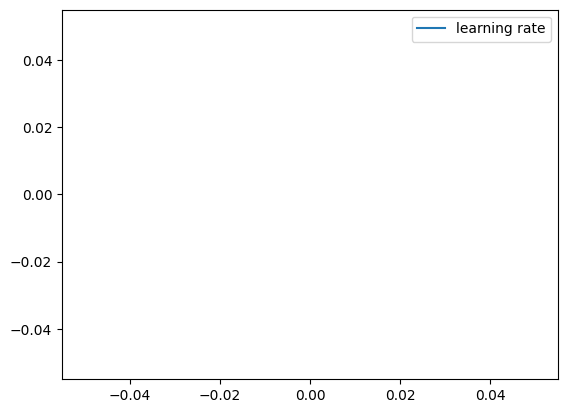

In [ ]:
plt.style.use('fast')
plt.plot(learning_rates, label='learning rate')
plt.legend()
plt.savefig('step_lr.png')

</hline>

In [ ]:
device = torch.device('cuda:0')

transform_train = transforms.Compose([transforms.ToTensor()])

transform_test = transforms.Compose(
    [transforms.ToTensor()])

batch_size = 32 #same as part 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)

In [ ]:
learn_rate = 0.001
n_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learn_rate, momentum=0.9)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.6)

In [ ]:
running_loss_list = []
running_val_loss_list = []

running_acc_list = []
running_val_acc_list = []

learning_rates = []

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print("Epoch", epoch)
    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        count += 1

        _, prediction = torch.max(outputs.data, 1)
        correct += (prediction == labels).sum().item()
        total += labels.size(0)
    running_loss_list.append(running_loss/count)
    running_acc_list.append(correct/total)

    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()
    
    with torch.no_grad():
      running_val_loss = 0.0
      count = 0
      correct = 0
      total = 0

      for val_images, val_labels in testloader:
          val_images = val_images.to(device)
          val_labels = val_labels.to(device)

          val_outputs = net(val_images)
          val_loss = criterion(val_outputs, val_labels)

          running_val_loss += val_loss.item()
          count += 1

          _, val_prediction = torch.max(val_outputs.data, 1)
          correct += (val_prediction == val_labels).sum().item()
          total += val_labels.size(0)

    running_val_loss_list.append(running_val_loss/count)
    running_val_acc_list.append(correct/total)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


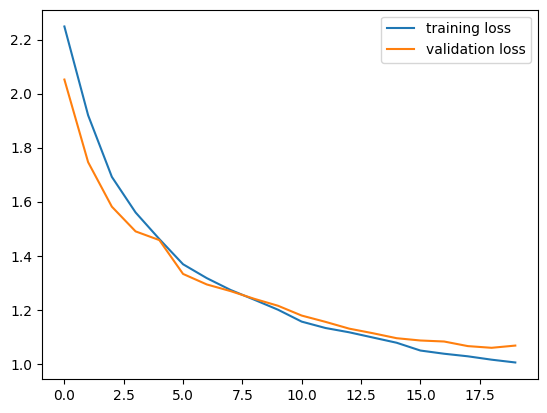

In [ ]:
plt.style.use('fast')
plt.plot(running_loss_list, label='training loss')
plt.plot(running_val_loss_list, label='validation loss')
plt.legend()
plt.savefig('loss_sgd.png')

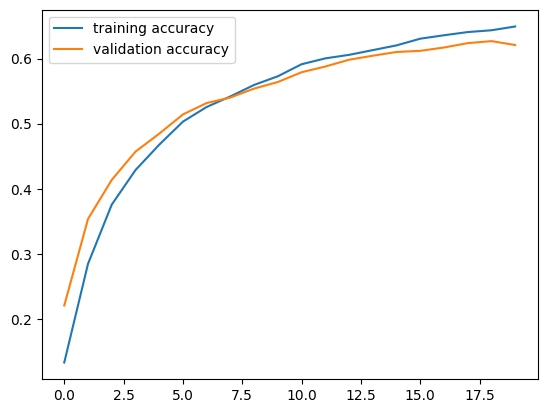

In [ ]:
plt.style.use('fast')
plt.plot(running_acc_list, label='training accuracy')
plt.plot(running_val_acc_list, label='validation accuracy')
plt.legend()
plt.savefig('acc_sgd.png')

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    print(f'{classname:5s} & {accuracy:.1f} \% \\\\')

plane & 64.9 \% \\
car   & 69.0 \% \\
bird  & 59.9 \% \\
cat   & 37.9 \% \\
deer  & 39.7 \% \\
dog   & 63.3 \% \\
frog  & 76.8 \% \\
horse & 61.3 \% \\
ship  & 79.2 \% \\
truck & 68.7 \% \\


</hline>

In [ ]:
device = torch.device('cuda:0')

transform_train = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16 #same as part 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 51786490.96it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)

In [ ]:
learn_rate = 0.001
n_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)

In [ ]:
running_loss_list = []
running_val_loss_list = []

running_acc_list = []
running_val_acc_list = []

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print("Epoch", epoch)
    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        count += 1

        _, prediction = torch.max(outputs.data, 1)
        correct += (prediction == labels).sum().item()
        total += labels.size(0)
    running_loss_list.append(running_loss/count)
    running_acc_list.append(correct/total)
    
    with torch.no_grad():
      running_val_loss = 0.0
      count = 0
      correct = 0
      total = 0

      for val_images, val_labels in testloader:
          val_images = val_images.to(device)
          val_labels = val_labels.to(device)

          val_outputs = net(val_images)
          val_loss = criterion(val_outputs, val_labels)

          running_val_loss += val_loss.item()
          count += 1

          _, val_prediction = torch.max(val_outputs.data, 1)
          correct += (val_prediction == val_labels).sum().item()
          total += val_labels.size(0)

    running_val_loss_list.append(running_val_loss/count)
    running_val_acc_list.append(correct/total)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


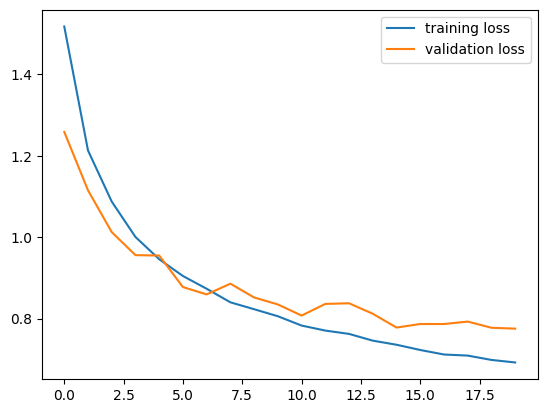

In [ ]:
plt.style.use('fast')
plt.plot(running_loss_list, label='training loss')
plt.plot(running_val_loss_list, label='validation loss')
plt.legend()
#plt.savefig('loss_lr_00001.png')
plt.savefig('loss_batch_16.png')

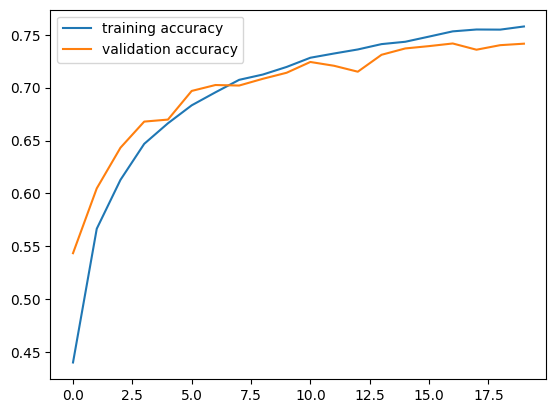

In [ ]:
plt.style.use('fast')
plt.plot(running_acc_list, label='training accuracy')
plt.plot(running_val_acc_list, label='validation accuracy')
plt.legend()
#plt.savefig('acc_lr_00001.png')
plt.savefig('acc_batch_16.png')

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    print(f'{classname:5s} & {accuracy:.1f} \% \\\\')

plane & 68.7 \% \\
car   & 89.3 \% \\
bird  & 71.8 \% \\
cat   & 57.4 \% \\
deer  & 72.6 \% \\
dog   & 65.7 \% \\
frog  & 74.0 \% \\
horse & 78.1 \% \\
ship  & 81.8 \% \\
truck & 82.2 \% \\


</hline>

In [ ]:
device = torch.device('cuda:0')

transform_train = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8 #same as part 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)

In [ ]:
learn_rate = 0.001
n_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)

In [ ]:
running_loss_list = []
running_val_loss_list = []

running_acc_list = []
running_val_acc_list = []

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print("Epoch", epoch)
    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        count += 1

        _, prediction = torch.max(outputs.data, 1)
        correct += (prediction == labels).sum().item()
        total += labels.size(0)
    running_loss_list.append(running_loss/count)
    running_acc_list.append(correct/total)
    
    with torch.no_grad():
      running_val_loss = 0.0
      count = 0
      correct = 0
      total = 0

      for val_images, val_labels in testloader:
          val_images = val_images.to(device)
          val_labels = val_labels.to(device)

          val_outputs = net(val_images)
          val_loss = criterion(val_outputs, val_labels)

          running_val_loss += val_loss.item()
          count += 1

          _, val_prediction = torch.max(val_outputs.data, 1)
          correct += (val_prediction == val_labels).sum().item()
          total += val_labels.size(0)

    running_val_loss_list.append(running_val_loss/count)
    running_val_acc_list.append(correct/total)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


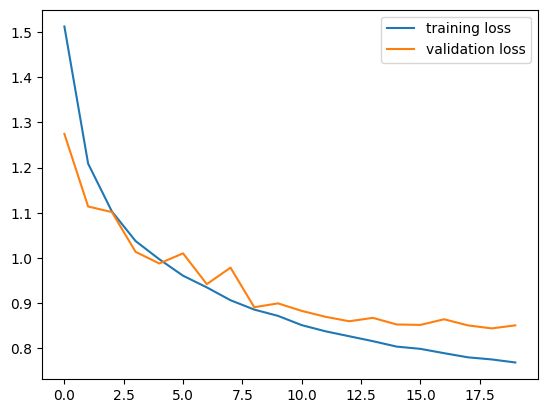

In [ ]:
plt.style.use('fast')
plt.plot(running_loss_list, label='training loss')
plt.plot(running_val_loss_list, label='validation loss')
plt.legend()
#plt.savefig('loss_lr_1.png')
plt.savefig('loss_batch_8.png')

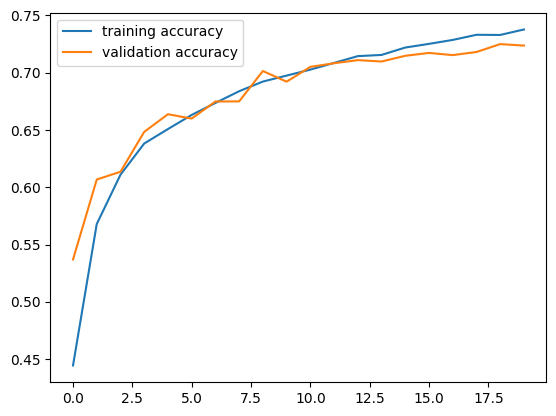

In [ ]:
plt.style.use('fast')
plt.plot(running_acc_list, label='training accuracy')
plt.plot(running_val_acc_list, label='validation accuracy')
plt.legend()
#plt.savefig('acc_lr_1.png')
plt.savefig('acc_batch_8.png')

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    print(f'{classname:5s} & {accuracy:.1f} \% \\\\')

plane & 80.1 \% \\
car   & 85.2 \% \\
bird  & 63.0 \% \\
cat   & 50.6 \% \\
deer  & 69.9 \% \\
dog   & 69.5 \% \\
frog  & 80.3 \% \\
horse & 74.8 \% \\
ship  & 75.5 \% \\
truck & 74.8 \% \\


</hline>

In [ ]:
device = torch.device('cuda:0')

transform_train = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_test = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4 #same as part 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.fc1 = nn.Linear(64*3*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net().to(device)


In [ ]:

learn_rate = 0.001
n_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learn_rate)


In [ ]:

running_loss_list = []
running_val_loss_list = []

running_acc_list = []
running_val_acc_list = []

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print("Epoch", epoch)
    running_loss = 0.0
    count = 0
    correct = 0
    total = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        count += 1

        _, prediction = torch.max(outputs.data, 1)
        correct += (prediction == labels).sum().item()
        total += labels.size(0)
    running_loss_list.append(running_loss/count)
    running_acc_list.append(correct/total)
    
    with torch.no_grad():
      running_val_loss = 0.0
      count = 0
      correct = 0
      total = 0

      for val_images, val_labels in testloader:
          val_images = val_images.to(device)
          val_labels = val_labels.to(device)

          val_outputs = net(val_images)
          val_loss = criterion(val_outputs, val_labels)

          running_val_loss += val_loss.item()
          count += 1

          _, val_prediction = torch.max(val_outputs.data, 1)
          correct += (val_prediction == val_labels).sum().item()
          total += val_labels.size(0)

    running_val_loss_list.append(running_val_loss/count)
    running_val_acc_list.append(correct/total)


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


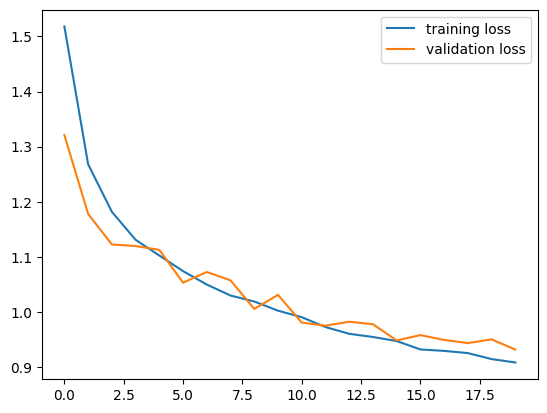

In [ ]:

plt.style.use('fast')
plt.plot(running_loss_list, label='training loss')
plt.plot(running_val_loss_list, label='validation loss')
plt.legend()
plt.savefig('loss_batch_4.png')


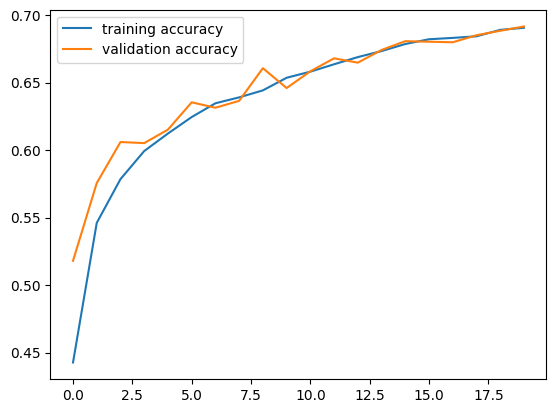

In [ ]:

plt.style.use('fast')
plt.plot(running_acc_list, label='training accuracy')
plt.plot(running_val_acc_list, label='validation accuracy')
plt.legend()
plt.savefig('acc_batch_4.png')


In [ ]:

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    #print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    print(f'{classname:5s} & {accuracy:.1f} \% \\\\')


plane & 70.4 \% \\
car   & 80.3 \% \\
bird  & 50.1 \% \\
cat   & 66.6 \% \\
deer  & 63.5 \% \\
dog   & 47.8 \% \\
frog  & 75.0 \% \\
horse & 76.5 \% \\
ship  & 81.4 \% \\
truck & 80.0 \% \\
